# Hackaton

## Quelle(s) énergie(s) pour demain ?

### Groupe: DUAN Zhiya, LEGOUX Paul, LI xi, XU Li



sources de datasets:

- https://www.bp.com/en/global/corporate/energy-economics/statistical-review-of-world-energy.html  
- https://www.kaggle.com/unitednations/international-energy-statistics/data
- http://data.gouv.fr
- https://www.statistiques.developpement-durable.gouv.fr
- http://api.eia.gov/
- http://www.worldbank.org

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from multiprocessing import Pool
from functools import reduce

# The energy supply's History in the US, based on the data EIA(Energy Information Administration)

In [2]:
df_history = pd.read_csv("dataset/historical_energy_consumption.csv",sep = ",")
df_sector = pd.read_csv("dataset/Consumation_by_sectors.csv")
df_source = pd.read_csv("dataset/primary-consumption-by-major-source.csv", skiprows=5, header = 0)

In [3]:
df_history

,Year,Coal,Natural Gas,Petroleum,Hydroelectric,Wood,Nuclear
0,1775,NaN,NaN,NaN,0.000,0.249,NaN
1,1785,NaN,NaN,NaN,0.000,0.310,NaN
2,1795,NaN,NaN,NaN,0.000,0.402,NaN
3,1805,NaN,NaN,NaN,0.000,0.537,NaN
4,1815,NaN,NaN,NaN,0.000,0.714,NaN
...,...,...,...,...,...,...,...
84,2005,22.797,22.561,40.391,2.703,2.136,8.160810
85,2006,22.447,22.224,39.955,2.869,2.109,8.215414
86,2007,22.749,23.702,39.769,2.446,2.098,8.455364
87,2008,22.385,23.791,37.279,2.511,2.044,8.427297


<Figure size 432x288 with 0 Axes>

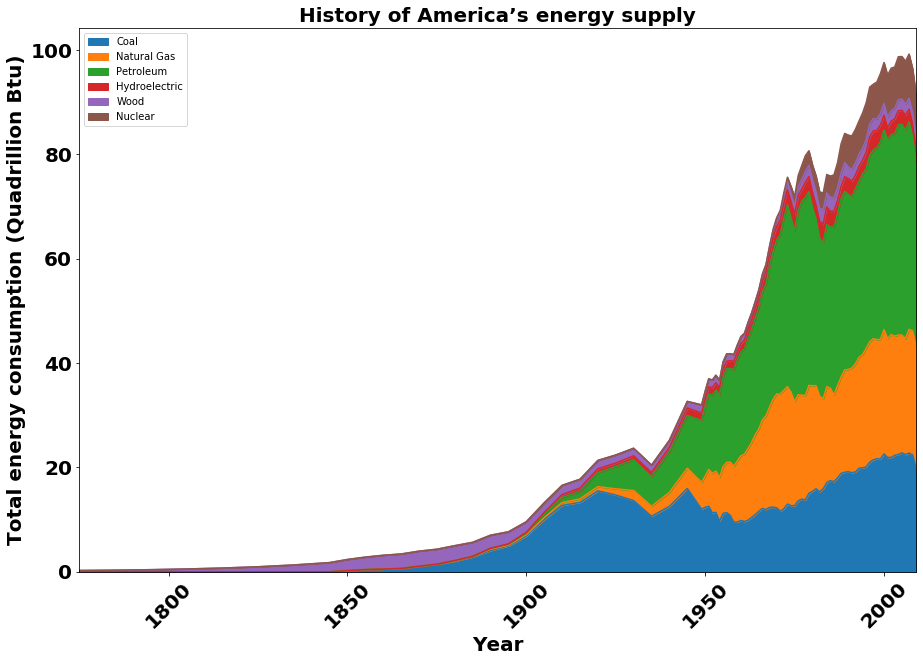

In [4]:
df_history.index = df_history.Year
plt.figure()

df_history.iloc[:,1:].plot.area(figsize=(15,10))
plt.xticks(fontsize=20, fontweight='bold',rotation=45)
plt.yticks(fontsize=20, fontweight='bold')

plt.xlabel('Year',fontsize=20, fontweight='bold')
plt.ylabel('Total energy consumption (Quadrillion Btu)',fontsize=20, fontweight='bold')
plt.title('History of America’s energy supply',fontsize=20, fontweight='bold')
#plt.savefig("History_energy_usa.eps", format = 'eps')
plt.show()

* The early settlers to North America relied on organic materials which is named "Wood" in this diagram.
* During the Industrial Revolution, the transition to fossil fuels had begun, coal is becoming the dominant source of energy. 
* Fuels such as petroleum and natural gas became very useful from the beginning of 20th.
* The discovery and advancement of nuclear technology made nuclear a new energy supply from mid 20th which account for 20% of all electricity generated in the United States.

In [5]:
df_source

,Unnamed: 0,coal,natural gas,petroleum,nuclear,renewables
0,1950,12.347109,5.968371,13.315484,0.000000,2.977718
1,1951,12.552996,7.048518,14.428043,0.000000,2.958464
2,1952,11.306479,7.549621,14.955682,0.000000,2.940181
3,1953,11.372684,7.906645,15.555829,0.000000,2.831460
4,1954,9.714667,8.330202,15.839176,0.000000,2.754099
...,...,...,...,...,...,...
64,2014,17.997632,27.382833,34.763494,8.337559,9.740229
65,2015,15.548870,28.191095,35.477609,8.336886,9.720298
66,2016,14.225905,28.400352,35.816631,8.426753,10.367812
67,2017,13.837465,28.034233,36.173585,8.418968,11.181246


<Figure size 432x288 with 0 Axes>

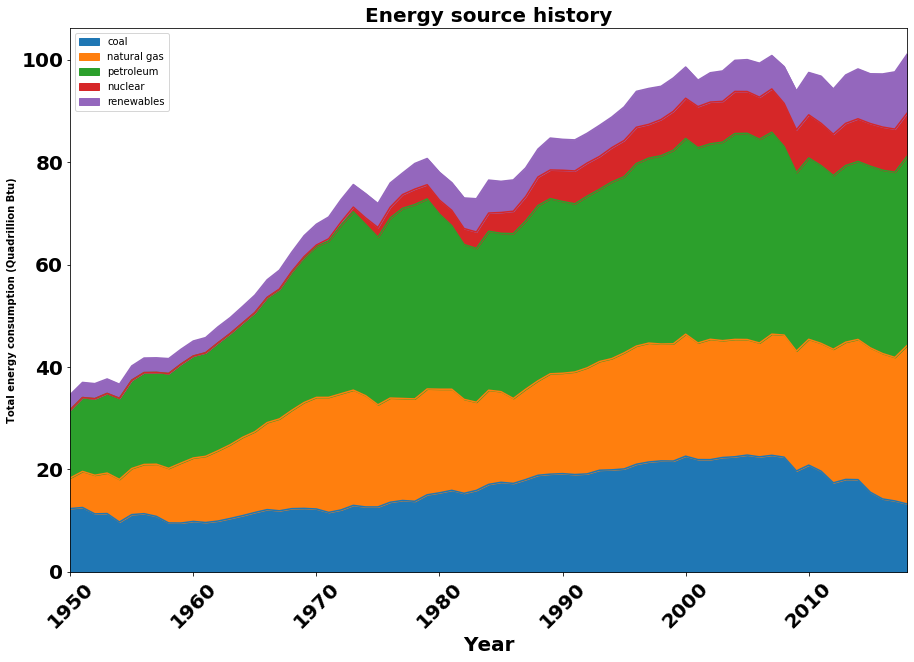

In [6]:
df_source.index = df_source["Unnamed: 0"]
plt.figure()

df_source.iloc[:,1:].plot.area(figsize=(15,10))
plt.xticks(fontsize=20, fontweight='bold',rotation=45)
plt.yticks(fontsize=20, fontweight='bold')

plt.xlabel('Year',fontsize=20, fontweight='bold')
plt.ylabel('Total energy consumption (Quadrillion Btu)',fontsize=10, fontweight='bold')
plt.title('Energy source history',fontsize=20, fontweight='bold')
#plt.savefig("History_energy_usa.eps", format = 'eps')
plt.show()

If we look closer, petroleum and natural gas are still the dominant energy source in today's USA while renewable energies are becoming more and more important.

In [7]:
df_sector["Description"].unique()
df_en_sector = df_sector[df_sector.YYYYMM.astype(str).str.endswith("13")]
df_en_sector.YYYYMM.apply(lambda x: str(x)[:-2])
df_sector_filt = df_en_sector
df_sector_filt = df_sector_filt.pivot(index = "YYYYMM", columns="Column_Order", values="Value" ).drop(columns = [1,3,5,7,9,10,11], axis = 1)
df_sector_filt.rename(columns={2:"Rsidential", 4:"Commercial", 6:"Industrial", 8:"Transportation"}, inplace=True)
df_sector_filt = df_sector_filt/1000

<Figure size 432x288 with 0 Axes>

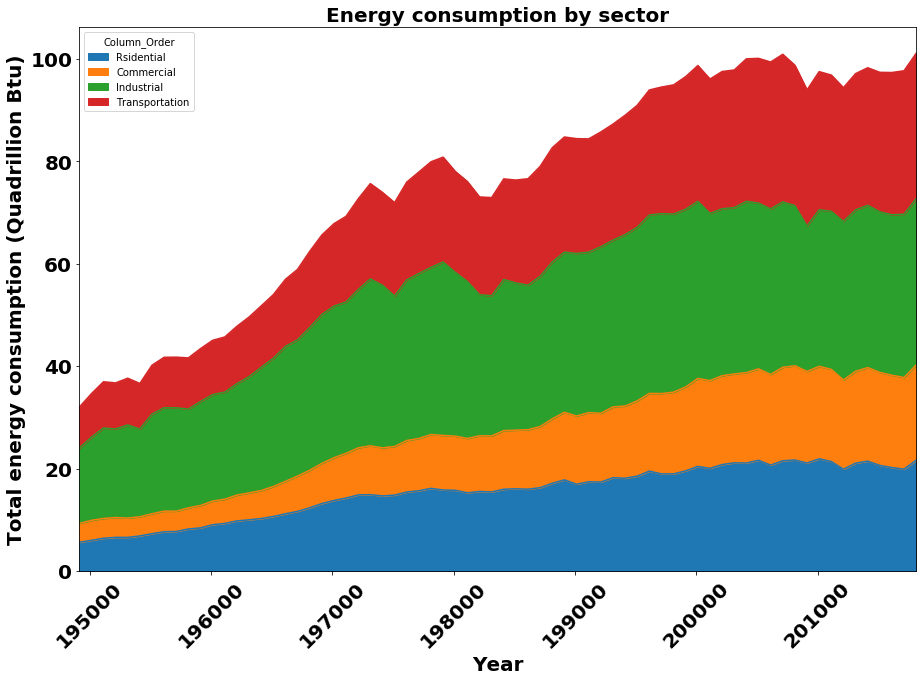

In [8]:
plt.figure()

df_sector_filt.plot.area(figsize=(15,10))
plt.xticks(fontsize=20, fontweight='bold',rotation=45)
plt.yticks(fontsize=20, fontweight='bold')

plt.xlabel('Year',fontsize=20, fontweight='bold')
plt.ylabel('Total energy consumption (Quadrillion Btu)',fontsize=20, fontweight='bold')
plt.title('Energy consumption by sector',fontsize=20, fontweight='bold')
plt.show()

# Production d'électricité par source d'énergie majeure

In [10]:
df = pd.read_csv('dataset/generation-major-source.csv')
#df['total'] = df.iloc[:,1:].sum(axis=1)
df.head()

,year,coal,natural gas,nuclear,renewables,petroleum and other
0,1950,155,45,0,101,34
1,1951,185,57,0,105,29
2,1952,195,68,0,110,30
3,1953,219,80,0,110,38
4,1954,239,94,0,112,32


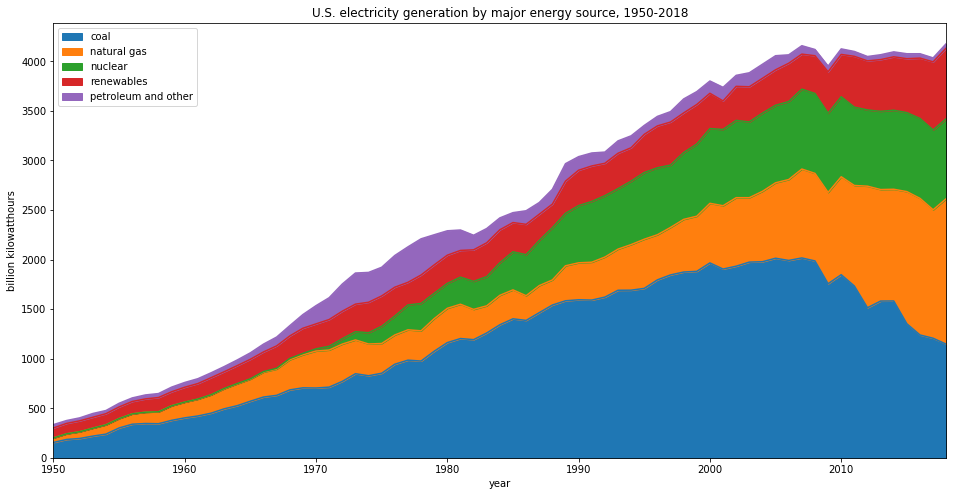

In [11]:
df.plot.area(figsize=(16, 8), x='year', title='U.S. electricity generation by major energy source, 1950-2018')
plt.ylabel("billion kilowatthours")
plt.show()

In [12]:
df_renew = pd.read_csv('dataset/generation-renewable-sources.csv')
#df_renew['total'] = df_renew.iloc[:,1:].sum(axis=1)
df_renew.head()

,year,hydroelectric,biomass,geothermal,wind,solar
0,1950,100.884575,0.389585,0.0,0.0,0.0
1,1951,104.376120,0.390784,0.0,0.0,0.0
2,1952,109.708251,0.481647,0.0,0.0,0.0
3,1953,109.617396,0.389418,0.0,0.0,0.0
4,1954,111.639772,0.263434,0.0,0.0,0.0


# Production d'électricité par source d'énergie renouvelable 

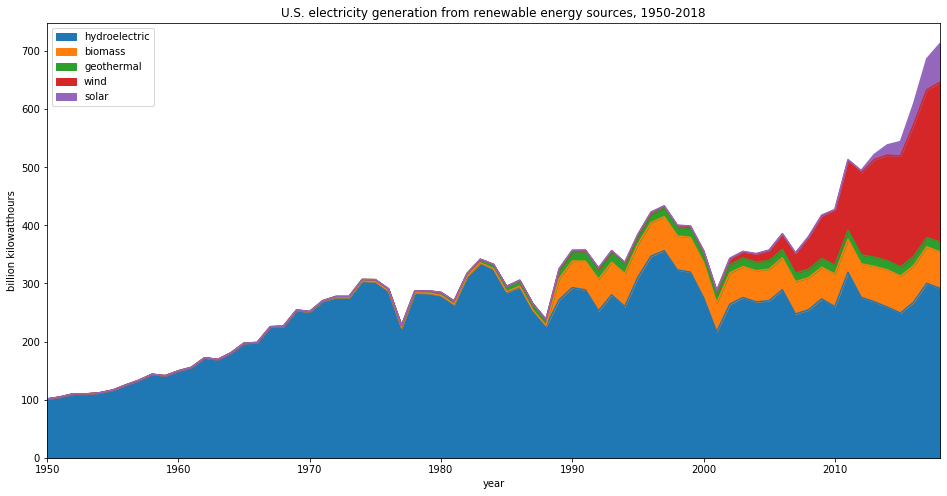

In [13]:
df_renew.plot.area(figsize=(16, 8), x='year', title='U.S. electricity generation from renewable energy sources, 1950-2018')
plt.ylabel("billion kilowatthours")
plt.show()

# Prix moyen de l'électricité a New York

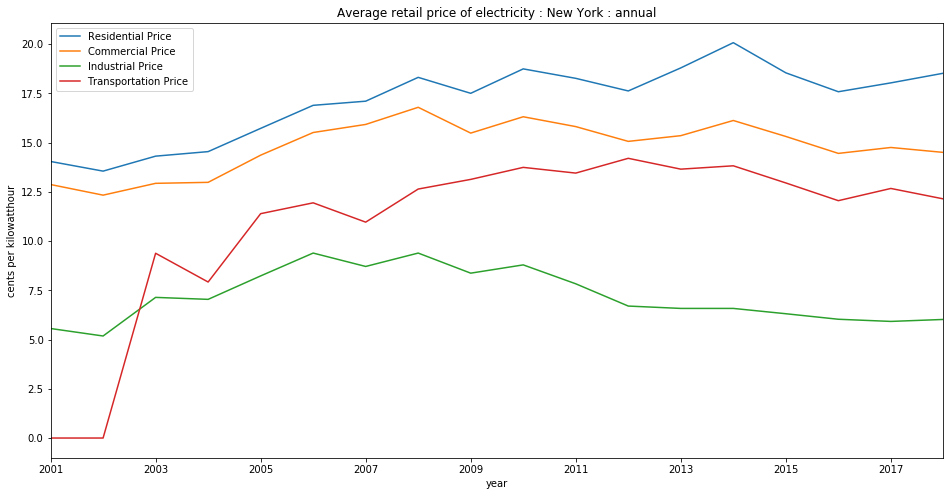

In [14]:
def get_elec_prices(series_id):
    key, value = series_id
    eia_api_key = "531e5d12836a56798627494fda60f26d"
    url = f"http://api.eia.gov/series/?api_key={eia_api_key}&series_id={value}"
    response = requests.get(url).json()
    return pd.DataFrame(response['series'][0]['data'], columns=['year', key]).sort_values('year')

# call parallel
sect_ids = {'Residential Price':'ELEC.PRICE.NY-RES.A', 
            'Commercial Price':'ELEC.PRICE.NY-COM.A',
            'Industrial Price':'ELEC.PRICE.NY-IND.A',
            'Transportation Price':'ELEC.PRICE.NY-TRA.A'
           }
p = Pool(processes=8)
price_list = p.map(get_elec_prices, sect_ids.items())

df_prices = reduce(lambda a, b : pd.merge(a,b, on = 'year'), price_list)

df_prices.plot(figsize=(16, 8), x='year', title='Average retail price of electricity : New York : annual')

plt.ylabel("cents per kilowatthour")
plt.show()


# Prix moyen du charbon livré à l'utilisation finale

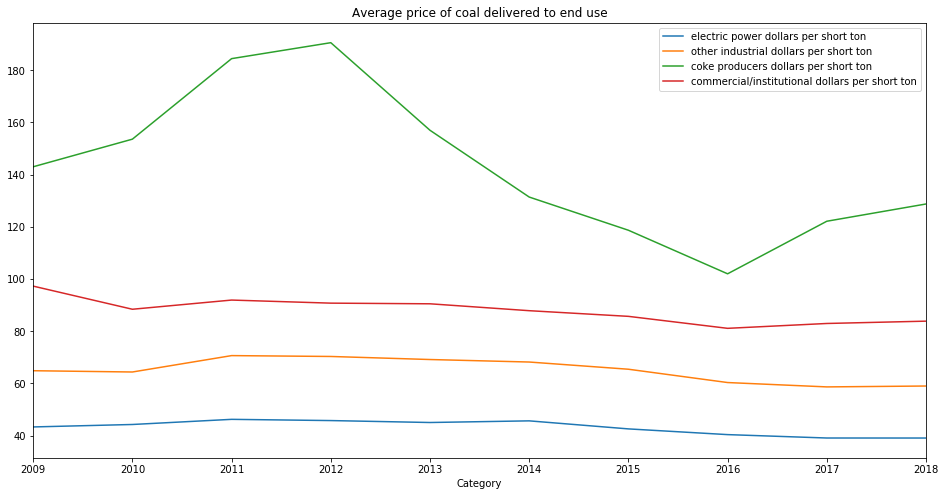

In [15]:
df_coal_price = pd.read_csv("dataset/Average_price_of_coal_delivered_to_end-use_sector_2009–18.csv")
df_coal_price.plot(figsize=(16, 8), x='Category', title='Average price of coal delivered to end use')
plt.show()

# prix moyen d'électricité par gaz

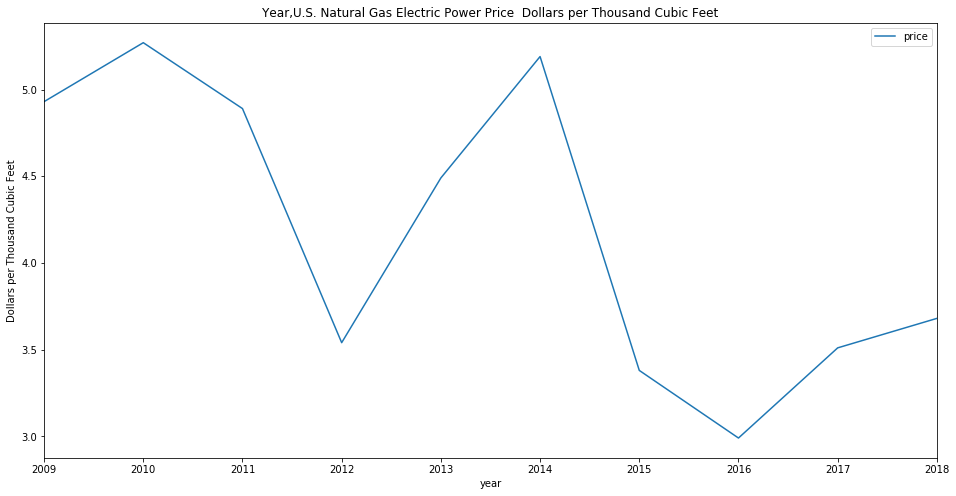

In [16]:
df_gaz_price = pd.read_csv("dataset/U.S._Natural_Gas_Electric_Power_Price.csv").sort_values('year')[-10:]
ax = df_gaz_price.plot(figsize=(16, 8), x='year', title='Year,U.S. Natural Gas Electric Power Price  Dollars per Thousand Cubic Feet')
plt.ylabel("Dollars per Thousand Cubic Feet")
ax.set_xticks(df_gaz_price['year'])
plt.show()

In [17]:
df = pd.read_csv("dataset/all_energy_statistics.csv")
df.head()

,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category
0,Austria,Additives and Oxygenates - Exports,1996,"Metric tons, thousand",5.0,NaN,additives_and_oxygenates
1,Austria,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",17.0,NaN,additives_and_oxygenates
2,Belgium,Additives and Oxygenates - Exports,2014,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
3,Belgium,Additives and Oxygenates - Exports,2013,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
4,Belgium,Additives and Oxygenates - Exports,2012,"Metric tons, thousand",35.0,NaN,additives_and_oxygenates


In [18]:
#Drop the column that majorly include null value
df.drop("quantity_footnotes", axis=1, inplace=True)

In [19]:
df['category'].value_counts()

total_electricity                  133916
gas_oil_diesel_oil                  97645
fuel_oil                            75132
natural_gas_including_lng           64161
liquified_petroleum_gas             62156
                                    ...  
uranium                               684
geothermal                            496
gas_coke                              365
other_coal_products                   105
tide_wave_and_ocean_electricity        58
Name: category, Length: 71, dtype: int64

In [20]:
df['commodity_transaction'].value_counts()

From combustible fuels – Main activity                                                              6601
Electricity - Gross demand                                                                          5532
Electricity - Own use by electricity, heat and CHP plants                                           5523
Electricity - total production, main activity                                                       5523
Electricity - net production                                                                        5523
                                                                                                    ... 
White spirit and special boiling point industrial spirits - Consumption by paper, pulp and print       1
Patent fuel - consumption in rail                                                                      1
Naphtha - Consumption by commerce and public services                                                  1
Paraffin waxes - Consumption by textile and leather    

In [21]:
Total_Electricity = df[df.category.isin(["total_electricity"])].sort_values(['year',"country_or_area"])
Total_Electricity.head()

,country_or_area,commodity_transaction,year,unit,quantity,category
1039413,Afghanistan,Electricity - Consumption by commercial and pu...,1990,"Kilowatt-hours, million",90.0,total_electricity
1045346,Afghanistan,Electricity - Consumption by households,1990,"Kilowatt-hours, million",282.0,total_electricity
1061045,Afghanistan,Electricity - Consumption by other,1990,"Kilowatt-hours, million",404.0,total_electricity
1079371,Afghanistan,"Electricity - Consumption in agriculture, fore...",1990,"Kilowatt-hours, million",32.0,total_electricity
1091796,Afghanistan,Electricity - Final energy consumption,1990,"Kilowatt-hours, million",404.0,total_electricity


In [22]:
Energy_consumption = Total_Electricity[Total_Electricity.commodity_transaction == "Electricity - Final energy consumption"]
Energy_consumption.head()

,country_or_area,commodity_transaction,year,unit,quantity,category
1091796,Afghanistan,Electricity - Final energy consumption,1990,"Kilowatt-hours, million",404.0,total_electricity
1091821,Albania,Electricity - Final energy consumption,1990,"Kilowatt-hours, million",2500.0,total_electricity
1091846,Algeria,Electricity - Final energy consumption,1990,"Kilowatt-hours, million",12320.0,total_electricity
1091871,American Samoa,Electricity - Final energy consumption,1990,"Kilowatt-hours, million",85.0,total_electricity
1091896,Andorra,Electricity - Final energy consumption,1990,"Kilowatt-hours, million",259.0,total_electricity


In [23]:
Energy_consumption['year'].value_counts()

2012    229
2013    229
2014    229
2011    226
2010    226
2009    226
2007    226
2008    226
2006    225
2005    225
2002    224
2004    224
2003    224
2001    221
2000    220
1999    219
1994    218
1996    218
1995    218
1997    218
1998    218
1992    217
1993    217
1991    190
1990    186
Name: year, dtype: int64

# Portion Energy Consumption 2014

In [24]:
Energy_consumption_2014 = Energy_consumption[Energy_consumption.year == 2014]
Energy_consumption_2014.head()

,country_or_area,commodity_transaction,year,unit,quantity,category
1091772,Afghanistan,Electricity - Final energy consumption,2014,"Kilowatt-hours, million",3767.300,total_electricity
1091797,Albania,Electricity - Final energy consumption,2014,"Kilowatt-hours, million",6523.200,total_electricity
1091822,Algeria,Electricity - Final energy consumption,2014,"Kilowatt-hours, million",45733.000,total_electricity
1091847,American Samoa,Electricity - Final energy consumption,2014,"Kilowatt-hours, million",134.769,total_electricity
1091872,Andorra,Electricity - Final energy consumption,2014,"Kilowatt-hours, million",474.499,total_electricity


In [25]:
total_consumpution_2014 = sum(Energy_consumption_2014['quantity'])

In [26]:
Energy_consumption_2014['portion'] = Energy_consumption_2014['quantity'] / total_consumpution_2014
Energy_consumption_2014.sort_values(['portion'],ascending=False).head(10)

,country_or_area,commodity_transaction,year,unit,quantity,category,portion
1092790,China,Electricity - Final energy consumption,2014,"Kilowatt-hours, million",4686376.1,total_electricity,0.236818
1097010,United States,Electricity - Final energy consumption,2014,"Kilowatt-hours, million",3787793.0,total_electricity,0.191410
1094271,Japan,Electricity - Final energy consumption,2014,"Kilowatt-hours, million",951487.0,total_electricity,0.048082
1094058,India,Electricity - Final energy consumption,2014,"Kilowatt-hours, million",948327.0,total_electricity,0.047922
1095890,Russian Federation,Electricity - Final energy consumption,2014,"Kilowatt-hours, million",737830.0,total_electricity,0.037285
1093656,Germany,Electricity - Final energy consumption,2014,"Kilowatt-hours, million",512835.0,total_electricity,0.025915
1092440,Brazil,Electricity - Final energy consumption,2014,"Kilowatt-hours, million",501399.0,total_electricity,0.025337
1092665,Canada,Electricity - Final energy consumption,2014,"Kilowatt-hours, million",489239.0,total_electricity,0.024723
1094443,"Korea, Republic of",Electricity - Final energy consumption,2014,"Kilowatt-hours, million",486834.0,total_electricity,0.024601
1093508,France,Electricity - Final energy consumption,2014,"Kilowatt-hours, million",415325.0,total_electricity,0.020988


# Evolution Energy Consumption 1990-2014

In [27]:
US_Consumption = Energy_consumption[Energy_consumption.country_or_area == "United States"].sort_values("year")
China_Consumption = Energy_consumption[Energy_consumption.country_or_area == "China"].sort_values("year")
Germany_Consumption = Energy_consumption[Energy_consumption.country_or_area == "Germany"].sort_values("year")
Japan_Consumption=Energy_consumption[Energy_consumption.country_or_area == "Japan"].sort_values("year")
India_Consumption=Energy_consumption[Energy_consumption.country_or_area == "India"].sort_values("year")
Russia_Consumption= Energy_consumption[Energy_consumption.country_or_area == "Russian Federation"].sort_values("year")
Brazil_Consumption= Energy_consumption[Energy_consumption.country_or_area == "Brazil"].sort_values("year")
France_Consumption= Energy_consumption[Energy_consumption.country_or_area == "France"].sort_values("year")
Canada_Consumption=Energy_consumption[Energy_consumption.country_or_area == "Canada"].sort_values("year")
Korea_Consumption=Energy_consumption[Energy_consumption.country_or_area == "Korea"].sort_values("year")

In [28]:
x1 = US_Consumption.year
y1 = US_Consumption.quantity
x2 = China_Consumption.year
y2 = China_Consumption.quantity
x3 = Germany_Consumption.year
y3 = Germany_Consumption.quantity
x4 = Japan_Consumption.year
y4 = Japan_Consumption.quantity
x5 = India_Consumption.year
y5 = India_Consumption.quantity
x6 = Russia_Consumption.year
y6 = Russia_Consumption.quantity
x7 = Brazil_Consumption.year
y7 = Brazil_Consumption.quantity
x8 = France_Consumption.year
y8 = France_Consumption.quantity
x9 = Canada_Consumption.year
y9 = Canada_Consumption.quantity
x10 = Korea_Consumption.year
y10 = Korea_Consumption.quantity

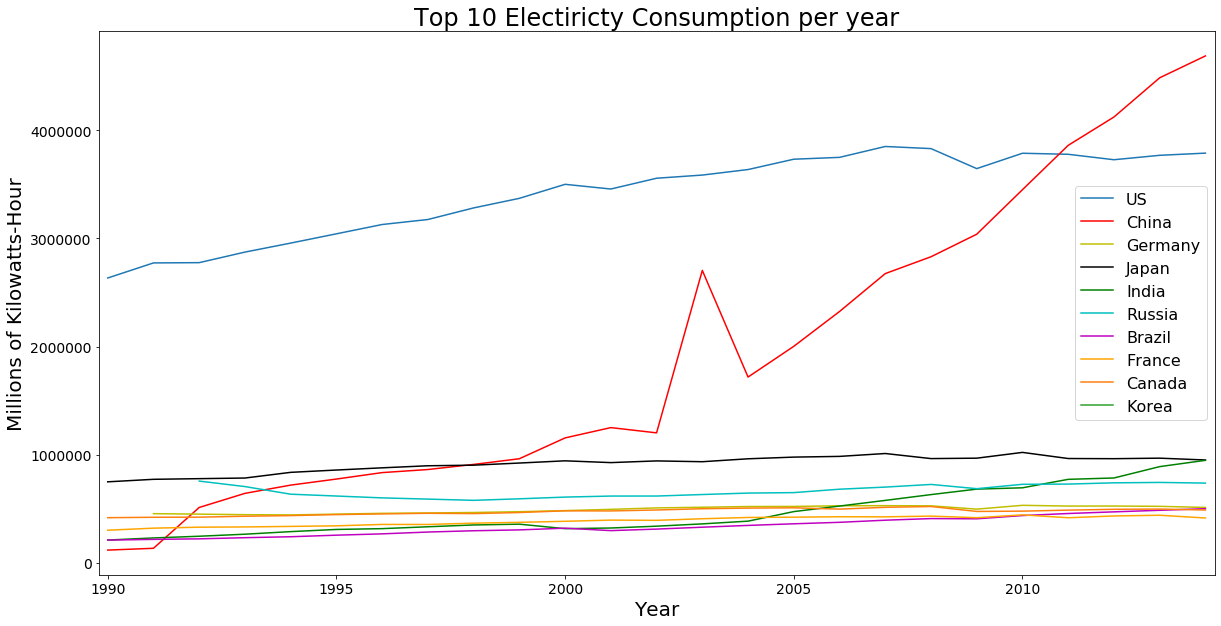

In [29]:
plt.figure(figsize=(20,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(x1,y1,label="US")
plt.plot(x2,y2,'r',label="China")
plt.plot(x3,y3,'y',label="Germany")
plt.plot(x4,y4,'k',label="Japan")
plt.plot(x5,y5,'g',label="India")
plt.plot(x6,y6,'c',label="Russia")
plt.plot(x7,y7,'m',label="Brazil")
plt.plot(x8,y8,'orange',label="France")
plt.plot(x9,y9,label="Canada")
plt.plot(x10,y10,label="Korea")

plt.legend(fontsize=16)
plt.ylabel("Millions of Kilowatts-Hour",fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.title('Top 10 Electiricty Consumption per year',fontsize=24)
plt.xlim(1989.8, 2014.2)
fig = plt.gcf()
plt.show()

In [30]:
# fig.savefig('Top 10 Electiricty Consumption per year.png')

# Evolution Energy Production 1990-2014

In [31]:
conventional_crude=df[df.category=="total_electricity"].sort_values("year")
conventional_crude["commodity_transaction"].value_counts().head(10)

Electricity - Gross demand                                   5532
Electricity - Gross production                               5523
Electricity - total production, main activity                5523
Electricity - net production                                 5523
Electricity - Own use by electricity, heat and CHP plants    5523
Electricity - Final energy consumption                       5499
Electricity - Consumption by other                           5491
From combustible fuels – Main activity                       5469
Electricity - Consumption by households                      5180
Electricity - Losses                                         5168
Name: commodity_transaction, dtype: int64

In [32]:
Energy_production = Total_Electricity[Total_Electricity.commodity_transaction == "Electricity - net production"]
Energy_production.head()

,country_or_area,commodity_transaction,year,unit,quantity,category
1116195,Afghanistan,Electricity - net production,1990,"Kilowatt-hours, million",1055.0,total_electricity
1116220,Albania,Electricity - net production,1990,"Kilowatt-hours, million",3197.0,total_electricity
1116245,Algeria,Electricity - net production,1990,"Kilowatt-hours, million",14966.0,total_electricity
1116270,American Samoa,Electricity - net production,1990,"Kilowatt-hours, million",98.0,total_electricity
1116295,Andorra,Electricity - net production,1990,"Kilowatt-hours, million",120.0,total_electricity


In [33]:
Energy_production_2014 = Energy_production[Energy_production.year == 2014]
Energy_production_2014.head()

,country_or_area,commodity_transaction,year,unit,quantity,category
1116171,Afghanistan,Electricity - net production,2014,"Kilowatt-hours, million",776.000,total_electricity
1116196,Albania,Electricity - net production,2014,"Kilowatt-hours, million",4724.430,total_electricity
1116221,Algeria,Electricity - net production,2014,"Kilowatt-hours, million",57675.000,total_electricity
1116246,American Samoa,Electricity - net production,2014,"Kilowatt-hours, million",147.364,total_electricity
1116271,Andorra,Electricity - net production,2014,"Kilowatt-hours, million",126.800,total_electricity


In [34]:
total_production_2014 = sum(Energy_production_2014['quantity'])

In [35]:
Energy_production_2014['portion'] = Energy_production_2014['quantity'] / total_production_2014
Energy_production_2014.sort_values(['portion'],ascending=False).head(10)

,country_or_area,commodity_transaction,year,unit,quantity,category,portion
1117191,China,Electricity - net production,2014,"Kilowatt-hours, million",5230504.0,total_electricity,0.230731
1121427,United States,Electricity - net production,2014,"Kilowatt-hours, million",4122391.0,total_electricity,0.181850
1118473,India,Electricity - net production,2014,"Kilowatt-hours, million",1278907.0,total_electricity,0.056416
1118686,Japan,Electricity - net production,2014,"Kilowatt-hours, million",1006879.0,total_electricity,0.044416
1120299,Russian Federation,Electricity - net production,2014,"Kilowatt-hours, million",994657.0,total_electricity,0.043877
1117066,Canada,Electricity - net production,2014,"Kilowatt-hours, million",636960.0,total_electricity,0.028098
1118060,Germany,Electricity - net production,2014,"Kilowatt-hours, million",591952.0,total_electricity,0.026113
1116841,Brazil,Electricity - net production,2014,"Kilowatt-hours, million",581854.0,total_electricity,0.025667
1117911,France,Electricity - net production,2014,"Kilowatt-hours, million",539416.0,total_electricity,0.023795
1118858,"Korea, Republic of",Electricity - net production,2014,"Kilowatt-hours, million",530007.0,total_electricity,0.023380


In [36]:
US_production = Energy_production[Energy_production.country_or_area == "United States"].sort_values("year")
China_production = Energy_production[Energy_production.country_or_area == "China"].sort_values("year")
Germany_production = Energy_production[Energy_production.country_or_area == "Germany"].sort_values("year")
Japan_production=Energy_production[Energy_production.country_or_area == "Japan"].sort_values("year")
India_production=Energy_production[Energy_production.country_or_area == "India"].sort_values("year")
Russia_production= Energy_production[Energy_production.country_or_area == "Russian Federation"].sort_values("year")
Brazil_production= Energy_production[Energy_production.country_or_area == "Brazil"].sort_values("year")
France_production= Energy_production[Energy_production.country_or_area == "France"].sort_values("year")
Canada_production=Energy_production[Energy_production.country_or_area == "Canada"].sort_values("year")
Korea_production=Energy_production[Energy_production.country_or_area == "Korea"].sort_values("year")

In [37]:
x1 = US_production.year
y1 = US_production.quantity
x2 = China_production.year
y2 = China_production.quantity
x3 = Germany_production.year
y3 = Germany_production.quantity
x4 = Japan_production.year
y4 = Japan_production.quantity
x5 = India_production.year
y5 = India_production.quantity
x6 = Russia_production.year
y6 = Russia_production.quantity
x7 = Brazil_production.year
y7 = Brazil_production.quantity
x8 = France_production.year
y8 = France_production.quantity
x9 = Canada_production.year
y9 = Canada_production.quantity
x10 = Korea_production.year
y10 = Korea_production.quantity

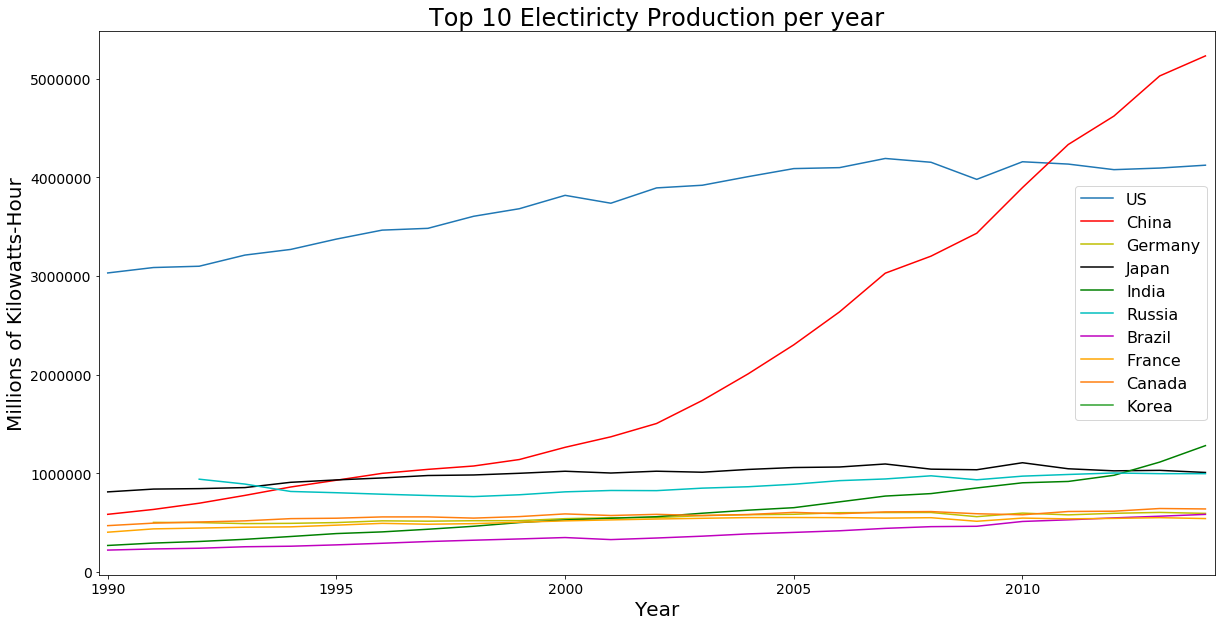

In [38]:
plt.figure(figsize=(20,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(x1,y1,label="US")
plt.plot(x2,y2,'r',label="China")
plt.plot(x3,y3,'y',label="Germany")
plt.plot(x4,y4,'k',label="Japan")
plt.plot(x5,y5,'g',label="India")
plt.plot(x6,y6,'c',label="Russia")
plt.plot(x7,y7,'m',label="Brazil")
plt.plot(x8,y8,'orange',label="France")
plt.plot(x9,y9,label="Canada")
plt.plot(x10,y10,label="Korea")

plt.legend(fontsize=16)
plt.ylabel("Millions of Kilowatts-Hour",fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.title('Top 10 Electiricty Production per year',fontsize=24)
plt.xlim(1989.8, 2014.2)
fig1 = plt.gcf()
plt.show()

In [39]:
# fig1.savefig('Top 10 Electiricty Production per year.png')

# From <url>worldbank.org

In [40]:
list_countries = ['United States', 'China', 'Germany', 'Japan', 'India', 'Russian Federation', 'Brazil', 'France', 'Canada', 'Korea, Rep.']

def test_country_name(row):
    if row['country_name'] in list_countries:
        return True
    else:
        return False
    
def clean_Dataset(df):
    df = df.drop(["Indicator Code", "Indicator Name", "Unnamed: 64"], axis=1, errors='ignore')
    df = df.fillna(0.)
    df.columns = ['country_name', 'country_code'] + list(range(1960, 2020))
    label_countries = {'United States': 'US', 'Russian Federation':'Russia', 'Korea, Rep.':'Korea'}
    
    df = df[df.apply(test_country_name, axis=1)].set_index('country_name')
    df.rename(index=label_countries)
    df = df.drop('country_code', axis=1)
    df = df.T
    df = df.reset_index().rename(columns={'index': 'year'}).set_index('year')
    return df
    
def plot(df, bar=False):
    plt.figure(figsize=(15,10))
    for country in df.columns:
        _range = list(range(1960,2015))
        if not bar:
            plt.plot(_range, df.loc[_range, country], label=country)
        else:
            plt.bar(_range, df.loc[_range, country], label=country)

    plt.legend()
    plt.show()  

## Emission CO2 per Country

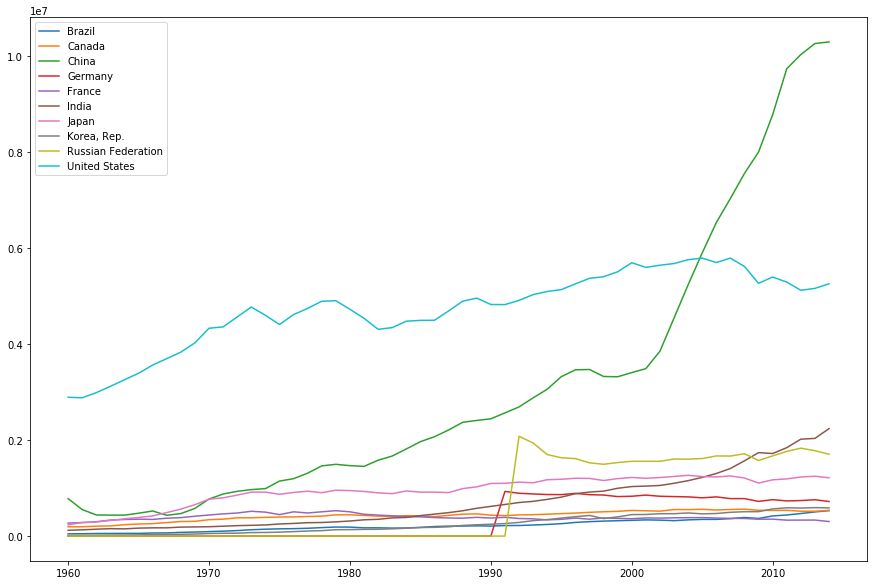

In [41]:
CO2_emission_kT = pd.read_csv("dataset/CO2_Emission_kT.csv") # in Kilo Tonnes
CO2_emission_kT = clean_Dataset(CO2_emission_kT)
plot(CO2_emission_kT)
#CO2_emission_kT

## percentage E renewable without hydraulic

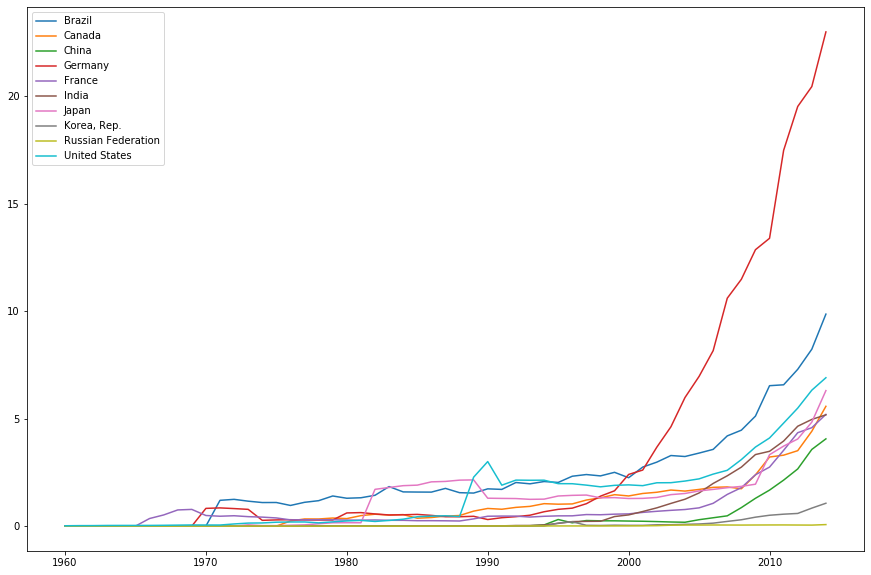

In [42]:
percent_E_renewable = pd.read_csv("dataset/percentage_E_renewable_without_hydraulic.csv") # in Kilo Tonnes
cleaned_df = clean_Dataset(percent_E_renewable)
plot(cleaned_df)

## GDP per Capita

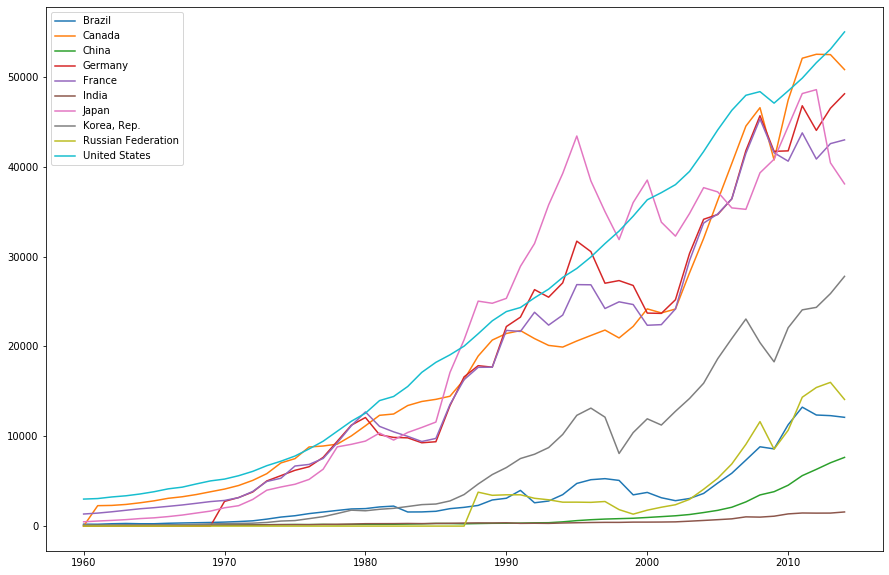

In [43]:
GDP_per_capita = pd.read_csv("dataset/GDP_per_capita.csv") # in Kilo Tonnes
cleaned_df = clean_Dataset(GDP_per_capita)
plot(cleaned_df)

## Urban population growth

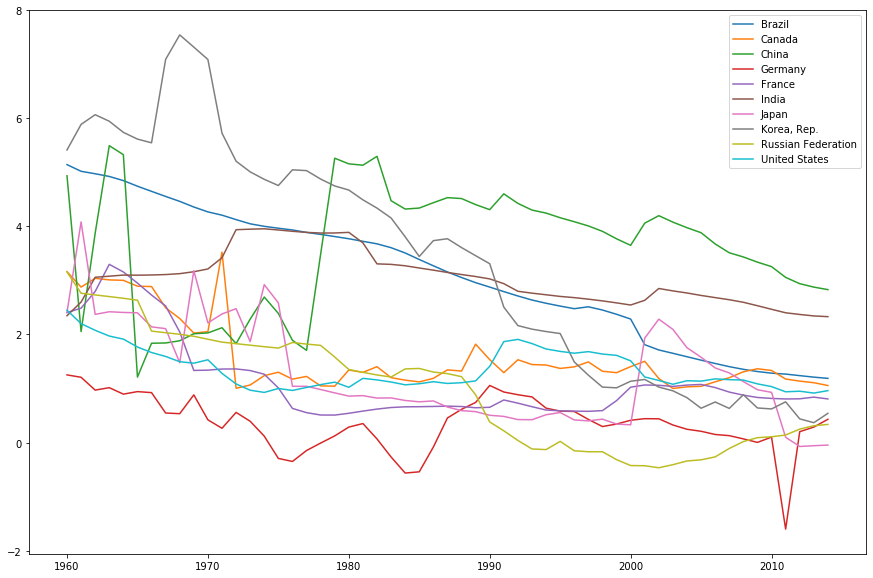

In [44]:
urban_population_growth = pd.read_csv("dataset/urban_population_growth.csv") # in Kilo Tonnes
cleaned_df = clean_Dataset(urban_population_growth)
plot(cleaned_df)